
# Proyecto 2

### Análisis de mercado inmobiliario

### Ingeniería de features, Modelos avanzados e Interpretación de modelos






### Consigna
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

### PARTE A - Transformación de Datos
Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

* Detección y eliminación de Outliers
* Encoding
* Imputación de valores faltantes
* Escalado de datos
* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

### PARTE B - Modelos Avanzados
* Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
* Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
* Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

### PARTE C - Interpretación de modelos
De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

* ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

* ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

### DESAFÍO OPCIONAL
Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

### Conclusiones Proyecto 1:

* Modelo: **Árbol de decisión**: RMSE mínimo en test de $138,384.87 , correspondiente a la profundidad k =  22 



## PARTE A:

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt

# Sklearn varios
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Clasificadores
from sklearn.tree import DecisionTreeClassifier

# Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Regresores
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#### Cargamos el dataset

In [143]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(properati.shape)
properati.head(5)

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


***Metodos de preprocesamiento elegidos:***

* ***Imputacion de valores faltantes:*** El dataset provisto presenta una gran cantidad de datos faltantes. Imputar valores para estos casos en vez de descartarlos podría mejorar los resultados obtenidos.

* ***Encoding:*** Teniendo en cuenta una de las conclusiones de la entrega anterior, resultaría muy enriquecedor poder agregar al modelo de ML las variables categóricas como por ejemplo los barrios o el tipo de propiedad.

* ***Eliminación de outliers:*** Como se pudo observar en la entrega anterior, muchas de las variables presentaban valores atípicos que distorsionaban en gran medida sus distribuciones. Eliminarlos podría mejorar la capacidad predictiva del modelo.

* ***Escalado de datos:***  Las variables poseen datos con magnitudes disímiles entre sí. Al normalizarlas, todas se encontrarán en el mismo rango y podrán ser más fácilmente comparables.


### Para poder comparar los nuevos resultados con los obtenidos en el primer proyecto, se realizara el mismo filtrado inicial:

* ***l2:*** Capital Federal  
* ***property_type:*** Departamento - PH - Casa
* ***Columnas:*** 'l3' - 'rooms' - 'bedrooms' - 'surface_total' - 'surface_covered' - 'price' - 'property_type' 





In [144]:
print(properati.isnull().sum())


filtrado = properati[properati.property_type.isin(['PH','Departamento','Casa'])& properati.l2.isin(['Capital Federal'])]

filtrado = filtrado.drop(columns=['lat','lon','start_date','end_date','created_on','l1','l2','currency','title','description','operation_type'])

filtrado.shape


start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


(91485, 8)

* ***Imputacion de valores faltantes:***

In [145]:

vf = pd.isnull(filtrado).values.sum()
print('Existen '+str(vf)+' valores faltantes en el dataset.'+'\n')
print(filtrado.isnull().sum())


Existen 20323 valores faltantes en el dataset.

l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64


In [146]:
#Genero la matriz de correlación para poder analizar la variable a elegir para realizar la imputación de las variables con faltantes.
filtrado.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.927300,0.603174,0.064774,0.066757,0.448318
bedrooms,0.927300,1.000000,0.603968,0.064468,0.066174,0.413555
bathrooms,0.603174,0.603968,1.000000,0.056524,0.058192,0.587724
surface_total,0.064774,0.064468,0.056524,1.000000,0.770742,0.049071
surface_covered,0.066757,0.066174,0.058192,0.770742,1.000000,0.054534
price,0.448318,0.413555,0.587724,0.049071,0.054534,1.000000


La imputación de la variable bathrooms se realizará teniendo en cuenta el valor de la variable rooms, que es la que presenta la mayor correlación

Vemos en la siguiente tabla que podemos aproximar que las propiedades con menos de 4 ambientes poseen en promedio 1 baño y las de entre 4 y 6 ambientes 2 baños. Imputaremos por la baja cantidad de casos también a las propiedades de más de 6 ambientes con 2 baños.

In [147]:
properatiImputado = filtrado.copy()

# Binneo las cantidades de baños 
properatiImputado['rooms_int'] = pd.cut(properatiImputado.rooms,bins = 10)

# Tomo la cantidad media de baños para cada bin
properatiImputadoAgregado = pd.DataFrame(properatiImputado.groupby('rooms_int').agg({'bathrooms': lambda x: round(x.mean(skipna=True))}))

# Cuento la cantidad de propiedades sin baño
properatiImputadoAgregado["count"] = properatiImputado.bathrooms.isnull().groupby([properatiImputado['rooms_int']]).sum().astype(int)
properatiImputadoAgregado.reset_index(inplace=True)
properatiImputadoAgregado

,rooms_int,bathrooms,count
0,"(0.975, 3.5]",1.0,1747
1,"(3.5, 6.0]",2.0,407
2,"(6.0, 8.5]",3.0,16
3,"(8.5, 11.0]",4.0,1
4,"(11.0, 13.5]",4.0,0
5,"(13.5, 16.0]",5.0,0
6,"(16.0, 18.5]",3.0,0
7,"(18.5, 21.0]",5.0,0
8,"(21.0, 23.5]",NaN,0
9,"(23.5, 26.0]",7.0,0


In [148]:
# Imputo los valores en la columna 'bathrooms'
filtrado['bathrooms'] = np.where(filtrado['bathrooms'].isnull(),
                                      np.select([filtrado['rooms'] < 4, filtrado['rooms'] >= 4],[1,2]),
                                      filtrado['bathrooms'])

print(filtrado.isnull().sum())

l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64


Para imputar los valores de surface_covered y surface_total faltantes:

* No resulta conveniente descartar una cantidad tan grande de instancias

* Imputar todos los valores al valor más frecuente en una de las variables que mejor correlaciona con el precio podría agregar demasiado ruido al resultado del modelo

Por lo que:

* Realizaré el mismo tratamiento que para bathrooms. Este será el de imputación por relación con la variable que mejor correlacione (de acuerdo con la matriz de correlación, esta será rooms)

#### surface_covered

In [149]:
properatiImputado2 = filtrado.copy()
# Binneo las cantidades de superficies cubiertas 
properatiImputado2['rooms_int'] = pd.cut(properatiImputado2.rooms,bins = 10)

# Tomo la cantidad media de surface_covered para cada bin
properatiImputadoAgregado2 = pd.DataFrame(properatiImputado2.groupby('rooms_int').agg({'surface_covered': lambda x: x.mode()}))

# Cuento la cantidad de propiedades 
properatiImputadoAgregado2["count"] = properatiImputado2.surface_covered.isnull().groupby([properatiImputado2['rooms_int']]).sum().astype(int)
properatiImputadoAgregado2.reset_index(inplace=True)
properatiImputadoAgregado2

,rooms_int,surface_covered,count
0,"(0.975, 3.5]",40,7133
1,"(3.5, 6.0]",100,2059
2,"(6.0, 8.5]",190,38
3,"(8.5, 11.0]",257,3
4,"(11.0, 13.5]",345,0
5,"(13.5, 16.0]",250,0
6,"(16.0, 18.5]","[275.0, 552.0]",2
7,"(18.5, 21.0]",466,0
8,"(21.0, 23.5]",None,0
9,"(23.5, 26.0]",835,0


Se puede ver que el grueso de los valores faltantes de la variable **surface_covered** se encuentran en el rango [0-6] habitaciones, por lo que segmentar para el resto de los casos no agregaría valor al análisis

Resulta conveniente, entonces, imputar:

40 m2 de superficie cubierta para las propiedades que posean menos de 2.25 habitaciones
60 m2 de superficie cubierta para las propiedades que posean entre 2.25 y 3.5 habitaciones
100 m2 de superficie cubierta para las propiedades que posean entre 3.5 y 4.75 habitaciones
200 m2 de superficie cubierta para las propiedades que posean entre 4.75 y 6 habitaciones
190 m2 de superficie cubierta para las propiedades que posean más de 6 habitaciones

In [150]:
# Imputo los valores promedio redondeados de cada tramo para los valores faltantes en la columna 'bathrooms'
filtrado['surface_covered'] = np.where(filtrado['surface_covered'].isnull(),
                                      np.select([filtrado['rooms'] < 2.25,((filtrado['rooms'] >= 2.25) & (filtrado['rooms'] < 3.5)),((filtrado['rooms'] >= 3.5) & (filtrado['rooms'] < 4.75)), ((filtrado['rooms'] >= 4.75) & (filtrado['rooms'] < 6)),filtrado['rooms'] >= 6],[40,60,100,200,190]),
                                      filtrado['surface_covered'])



print(filtrado.isnull().sum())

l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total      8917
surface_covered       0
price                 0
property_type         0
dtype: int64


#### surface_total

In [151]:
properatiImputado2 = filtrado.copy()
# Binneo las cantidades de superficies cubiertas
properatiImputado2['rooms_int'] = pd.cut(properatiImputado2.rooms,bins = 10)

# Tomo la cantidad media de surface_total para cada bin
properatiImputadoAgregado2 = pd.DataFrame(properatiImputado2.groupby('rooms_int').agg({'surface_total': lambda x: x.mode()}))

# Cuento la cantidad de propiedades 
properatiImputadoAgregado2["count"] = properatiImputado2.surface_total.isnull().groupby([properatiImputado2['rooms_int']]).sum().astype(int)
properatiImputadoAgregado2.reset_index(inplace=True)
properatiImputadoAgregado2

,rooms_int,surface_total,count
0,"(0.975, 3.5]",50,6918
1,"(3.5, 6.0]",100,1959
2,"(6.0, 8.5]",190,34
3,"(8.5, 11.0]","[400.0, 418.0]",4
4,"(11.0, 13.5]",525,0
5,"(13.5, 16.0]",540,0
6,"(16.0, 18.5]","[275.0, 575.0]",2
7,"(18.5, 21.0]",295,0
8,"(21.0, 23.5]",None,0
9,"(23.5, 26.0]",845,0


Se puede ver que el grueso de los valores faltantes de la variable **surface_total** se encuentran en el rango [0-3] habitaciones, por lo que segmentar para el resto de los casos no agregaría valor al análisis

Resulta conveniente, entonces, imputar:

50 m2 de superficie cubierta para las propiedades que posean menos de 3.5 habitaciones
100 m2 de superficie cubierta para las propiedades que posean entre 3.5 y 6 habitaciones
190 m2 de superficie cubierta para las propiedades que posean entre 6 y 8.5 habitaciones
400 m2 de superficie cubierta para las propiedades que posean mas de 8.5 habitaciones


In [152]:
filtrado['surface_total'] = np.where(filtrado['surface_total'].isnull(),
                                      np.select([filtrado['rooms'] < 3.5,((filtrado['rooms'] >= 3.5) & (filtrado['rooms'] < 6)),((filtrado['rooms'] >= 6) & (filtrado['rooms'] < 8.5)), filtrado['rooms'] >= 8.5],[50,100,190,400]),
                                      filtrado['surface_total'])
print(filtrado.isnull().sum())

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64


In [153]:
properatiSinFaltantes = filtrado.copy()

### Encoding

* Las variables a aplicar encoding serán el tipo de propiedad y el barrio

* Aplicare label encoding para el barrio (l3) y one hot encoding para el tipo de propiedad.

In [154]:

#One hot encoding "Tipo de propiedad"
properatiEncoded = pd.get_dummies(properatiSinFaltantes, columns=["property_type"], prefix=["propiedad"])

properatiEncoded.head(15)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,propiedad_Casa,propiedad_Departamento,propiedad_PH
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
6,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1
7,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1
8,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,0,0,1
9,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,0,0,1
10,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,0,0,1


In [155]:
label_encoder = preprocessing.LabelEncoder() 
properatiEncoded['l3']= label_encoder.fit_transform(properatiEncoded['l3'])

In [156]:
properatiEncoded.head(15)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,propiedad_Casa,propiedad_Departamento,propiedad_PH
0,38,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,8,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,26,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,26,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,44,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
6,44,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1
7,44,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1
8,31,1.0,1.0,1.0,45.0,37.0,89000.0,0,0,1
9,31,1.0,1.0,1.0,45.0,37.0,89000.0,0,0,1
10,50,2.0,1.0,2.0,66.0,49.0,170000.0,0,0,1


### Eliminación de outliers

La eliminación de outliers se dará sobre los atributos numéricos, estos son:

* bathrooms
* bedrooms
* rooms
* surface_total
* surface_covered
* price

Observo las distribuciones de los distintos atributos antes de la eliminación de outliers. Se puede ver que en casi todas existen valores atípicos que distorsionan su visualización, lo cual no permite ver las relaciones entre algunas a simple vista

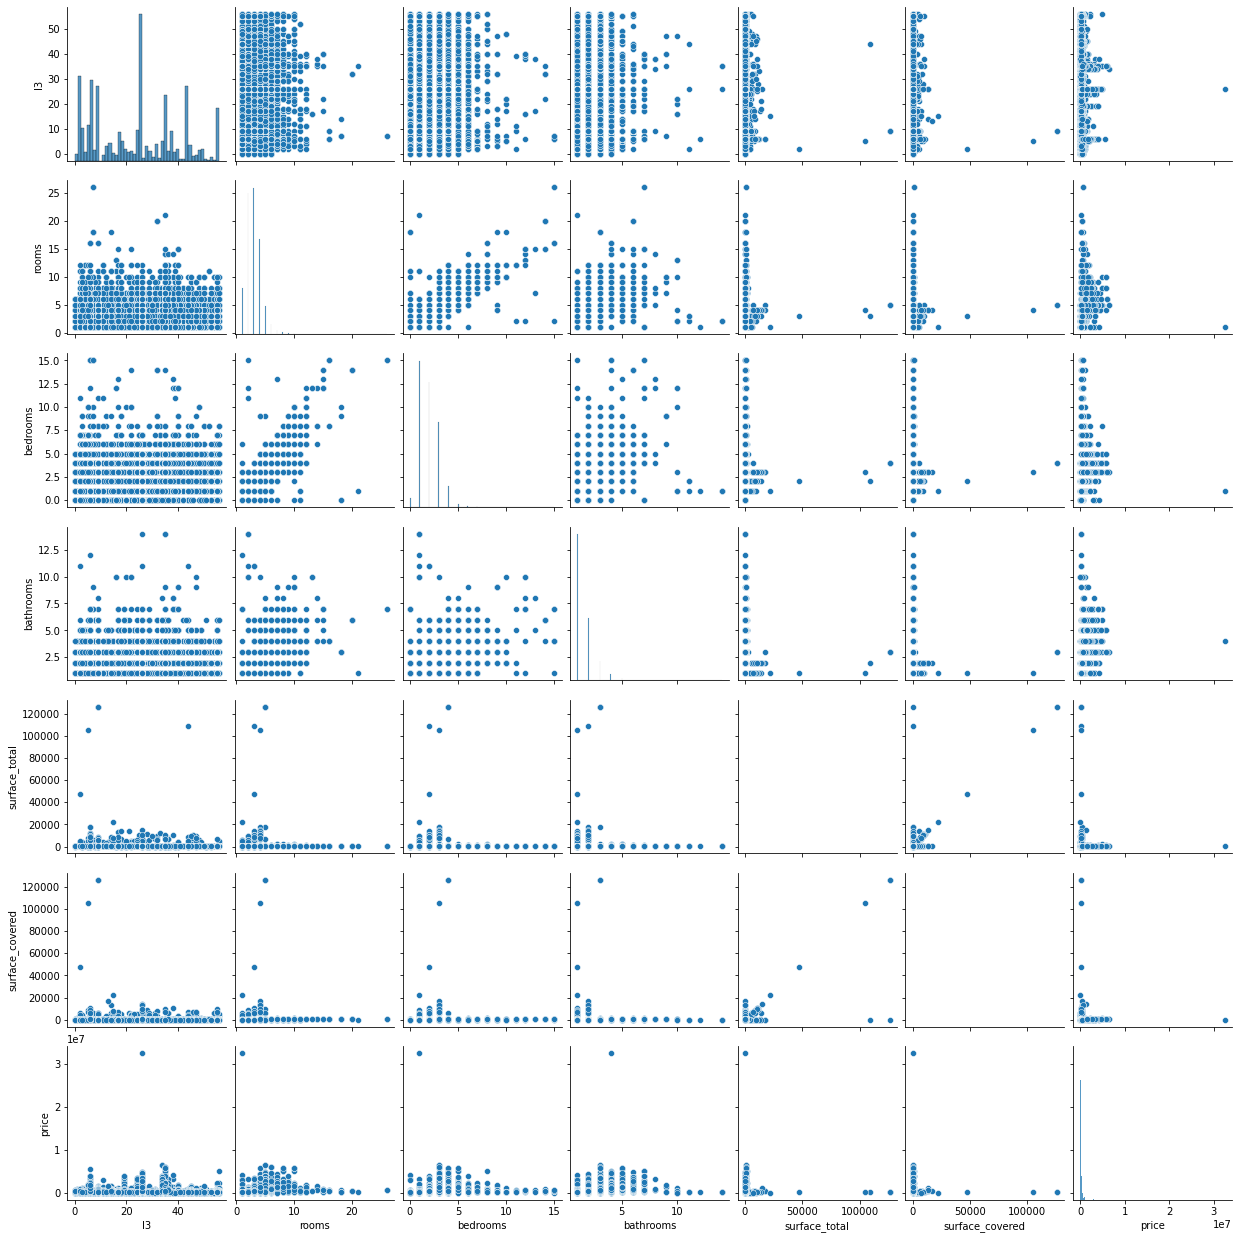

In [157]:
sns.pairplot(properatiEncoded.drop(['propiedad_Casa','propiedad_Departamento','propiedad_PH'],axis=1))

In [158]:

variables = ['bathrooms','bedrooms','rooms','surface_total','surface_covered','price']
properatiSinOutliers = properatiEncoded.copy()

# Acoto los datos a los valores entre +- 3 desviaciones estándar respecto de la media. En caso que la cota mínima sea negativa, la dejo en 0 
for i in variables:
    
#En caso que la cota mínima de la variable sea menor a 0, la trunco a este valor para que no sea negativa
    if properatiEncoded[i].mean() - 3*properatiEncoded[i].std() <0:
        minimo = 0
        maximo = properatiEncoded[i].mean() + 3*properatiEncoded[i].std()
        properatiSinOutliers = properatiSinOutliers[(properatiSinOutliers[i]>minimo)&(properatiSinOutliers[i]<maximo)|(properatiSinOutliers[i]==np.NaN)]

#En caso que la cota mínima de la variable sea mayor a 0, se calcula de la misma forma que la cota máxima
    else:
        minimo = properatiEncoded[i].mean() - 3*properatiEncoded[i].std()
        maximo = properatiEncoded[i].mean() + 3*properatiEncoded[i].std()
        properatiSinOutliers = properatiSinOutliers[(properatiSinOutliers[i]>minimo)&(properatiSinOutliers[i]<maximo)|(properatiSinOutliers[i]==np.NaN)]
    print("Variable",str(i),": valor medio: "+str(properatiEncoded[i].mean()),"STD: ",properatiEncoded[i].std(),"; valor mínimo:",str(minimo),";valor máximo: ",str(maximo))

Variable bathrooms : valor medio: 1.5514893151882823 STD:  0.8540381716810768 ; valor mínimo: 0 ;valor máximo:  4.113603830231513
Variable bedrooms : valor medio: 1.960277641143357 STD:  1.0729463462652755 ; valor mínimo: 0 ;valor máximo:  5.179116679939184
Variable rooms : valor medio: 2.9642782969885775 STD:  1.3147042162697156 ; valor mínimo: 0 ;valor máximo:  6.9083909457977235
Variable surface_total : valor medio: 107.77508881237361 STD:  931.8493383422733 ; valor mínimo: 0 ;valor máximo:  2903.3231038391937
Variable surface_covered : valor medio: 91.97364595288845 STD:  738.342680226091 ; valor mínimo: 0 ;valor máximo:  2307.0016866311616
Variable price : valor medio: 259500.25823905558 STD:  322265.44079864526 ; valor mínimo: 0 ;valor máximo:  1226296.5806349914


Se puede observar el efecto de la máscara aplicada en la modificación del pairplot respecto al graficado anteriormente

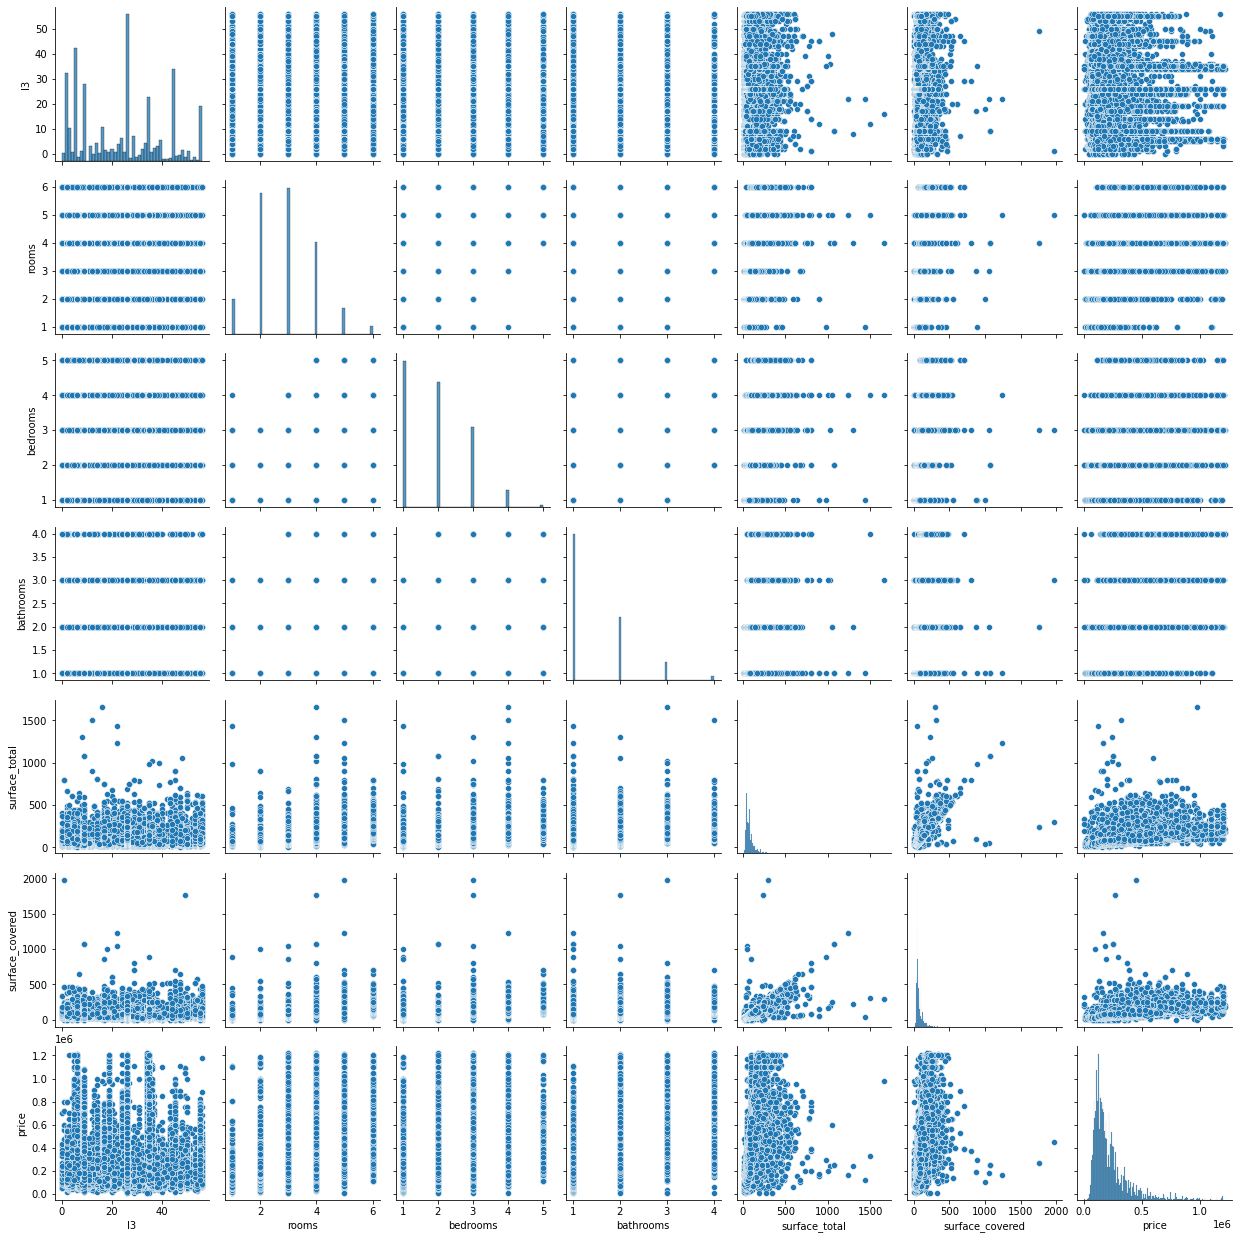

In [159]:

sns.pairplot(properatiSinOutliers.drop(['propiedad_Casa','propiedad_Departamento','propiedad_PH'],axis=1))

### Escalado de datos
* Para seleccionar el método de escalado se graficarán en primer lugar las distribuciones de las 6 variables:

/opt/miniconda3/envs/datascience./lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/miniconda3/envs/datascience./lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/miniconda3/envs/datascience./lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

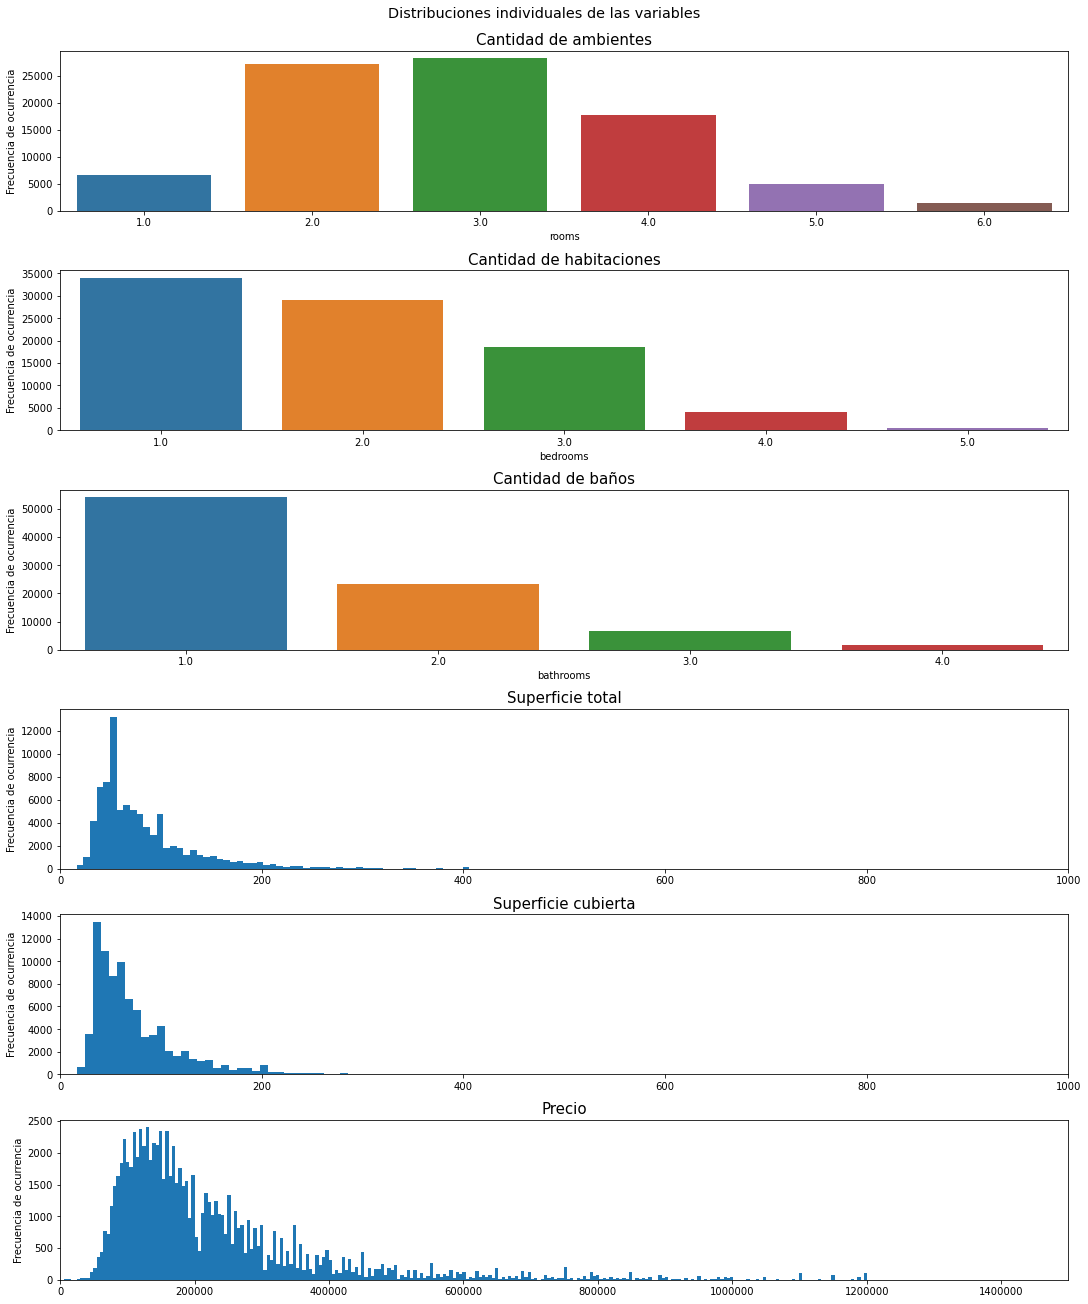

In [160]:
fig, axes = plt.subplots(6, 1, figsize=(15,18), constrained_layout=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

sns.countplot(properatiSinOutliers["rooms"],
              ax=ax1)
ax1.set_ylabel('Frecuencia de ocurrencia')
ax1.set_title("Cantidad de ambientes", fontdict={"fontsize":15})

sns.countplot(properatiSinOutliers["bedrooms"],
              ax=ax2)
ax2.set_ylabel('Frecuencia de ocurrencia')
ax2.set_title("Cantidad de habitaciones", fontdict={"fontsize":15})


sns.countplot(properatiSinOutliers["bathrooms"],
              ax=ax3)
ax3.set_ylabel('Frecuencia de ocurrencia')
ax3.set_title("Cantidad de baños", fontdict={"fontsize":15})

ax4.hist(properatiSinOutliers["surface_total"],
              bins=250)
ax4.set_xlim(0,1000)
ax4.set_ylabel('Frecuencia de ocurrencia')
ax4.set_title("Superficie total", fontdict={"fontsize":15})

ax5.hist(properatiSinOutliers["surface_covered"],
              bins=250)
ax5.set_xlim(0,1000)
ax5.set_ylabel('Frecuencia de ocurrencia')
ax5.set_title("Superficie cubierta", fontdict={"fontsize":15})

ax6.hist(properatiSinOutliers["price"],
              bins=250)
ax6.set_xlim(0,1500000)
ax6.set_ylabel('Frecuencia de ocurrencia')
ax6.set_title("Precio", fontdict={"fontsize":15})
ax6.ticklabel_format(style='plain')


fig.suptitle("Distribuciones individuales de las variables", size= "x-large")
plt.show()

Teniendo en cuenta las formas de las distribuciones del dataset anterior, podemos observar:

* El atributo rooms (cantidad de ambientes) posee una distribución normal
* El atributo surface_total (superficie total) posee una distribución logarítmica
* El atributo surface_covered (superficie cubierta) posee una distribución logarítmica
* El atributo price (precio) posee una distribución logarítmica

Para los atributos con distribución normal, aplicaremos una transformación Z-score, mientras que para los de distribución logarítmica aplicaremos transformación logarítmica

Transformación: Z-score
Atributo: rooms


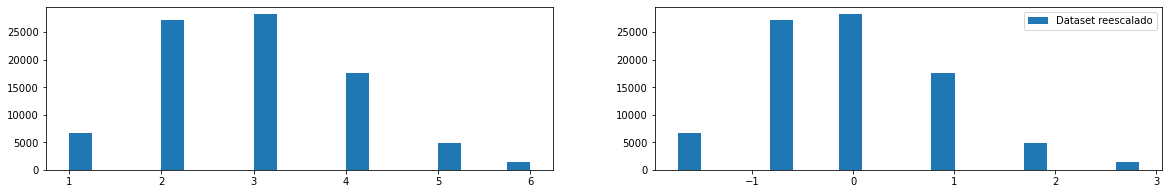

Atributo: bathrooms


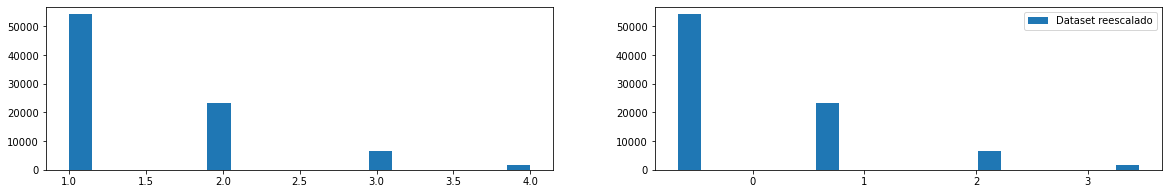

Atributo: bedrooms


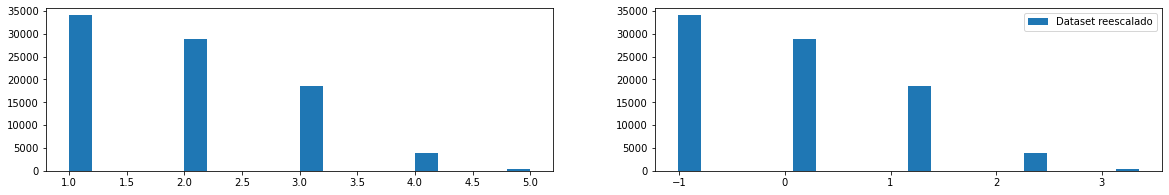

Transformación: logarítmica
Atributo: surface_total


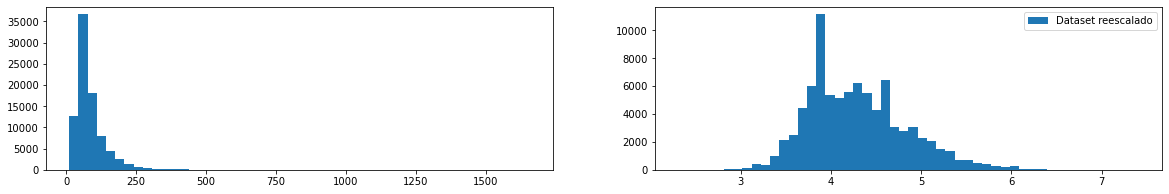

Atributo: surface_covered


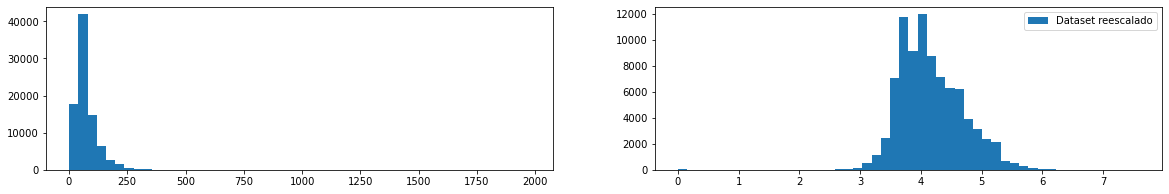

Atributo: price


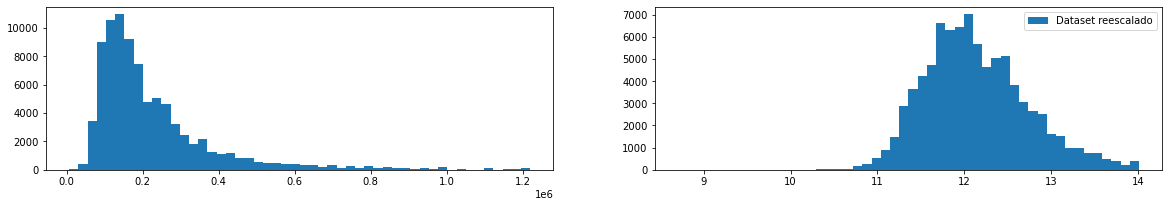

In [161]:
from sklearn.preprocessing import scale
dataset_transformado = properatiSinOutliers.copy()

# Transformación Z-Score

atributos = ['rooms', 'bathrooms','bedrooms']
print('Transformación: Z-score')

for i,columna in enumerate(atributos):
    atributo = atributos[i]
    print(f'Atributo: {atributo}')
    
    valor_medio = dataset_transformado[atributo].mean()
    std = dataset_transformado[atributo].std()
    dataset_transformado[atributo] = (dataset_transformado[atributo] - valor_medio)/std
    fig, [ax, ax1] = plt.subplots(nrows = 1,ncols = 2,figsize=(20,3)) 
    ax.hist(properatiSinOutliers[atributo],label = 'Dataset sin transformar',bins=20)
    ax1.hist(dataset_transformado[atributo],label = 'Dataset reescalado',bins=20)
    plt.legend()
    plt.show()


# Transformación logarítmica

atributos = ['surface_total', 'surface_covered','price']
print('Transformación: logarítmica')
for i,columna in enumerate(atributos):
    atributo = atributos[i]
    print(f'Atributo: {atributo}')
    
    # Aplico transformación logarítmica
    dataset_transformado[atributo] = np.log(dataset_transformado[atributo])
    
    fig, [ax, ax1] = plt.subplots(nrows = 1,ncols = 2,figsize=(20,3)) 
    
    ax.hist(properatiSinOutliers[atributo],label = 'Dataset sin transformar',bins=50)
    ax1.hist(dataset_transformado[atributo],label = 'Dataset reescalado',bins=50)
    
    plt.legend()
    plt.show()

Se puede observar que las variables normalizadas poseen distribuciones similares, permitiendo compararlas posteriormente en un modelo de Machine Learning

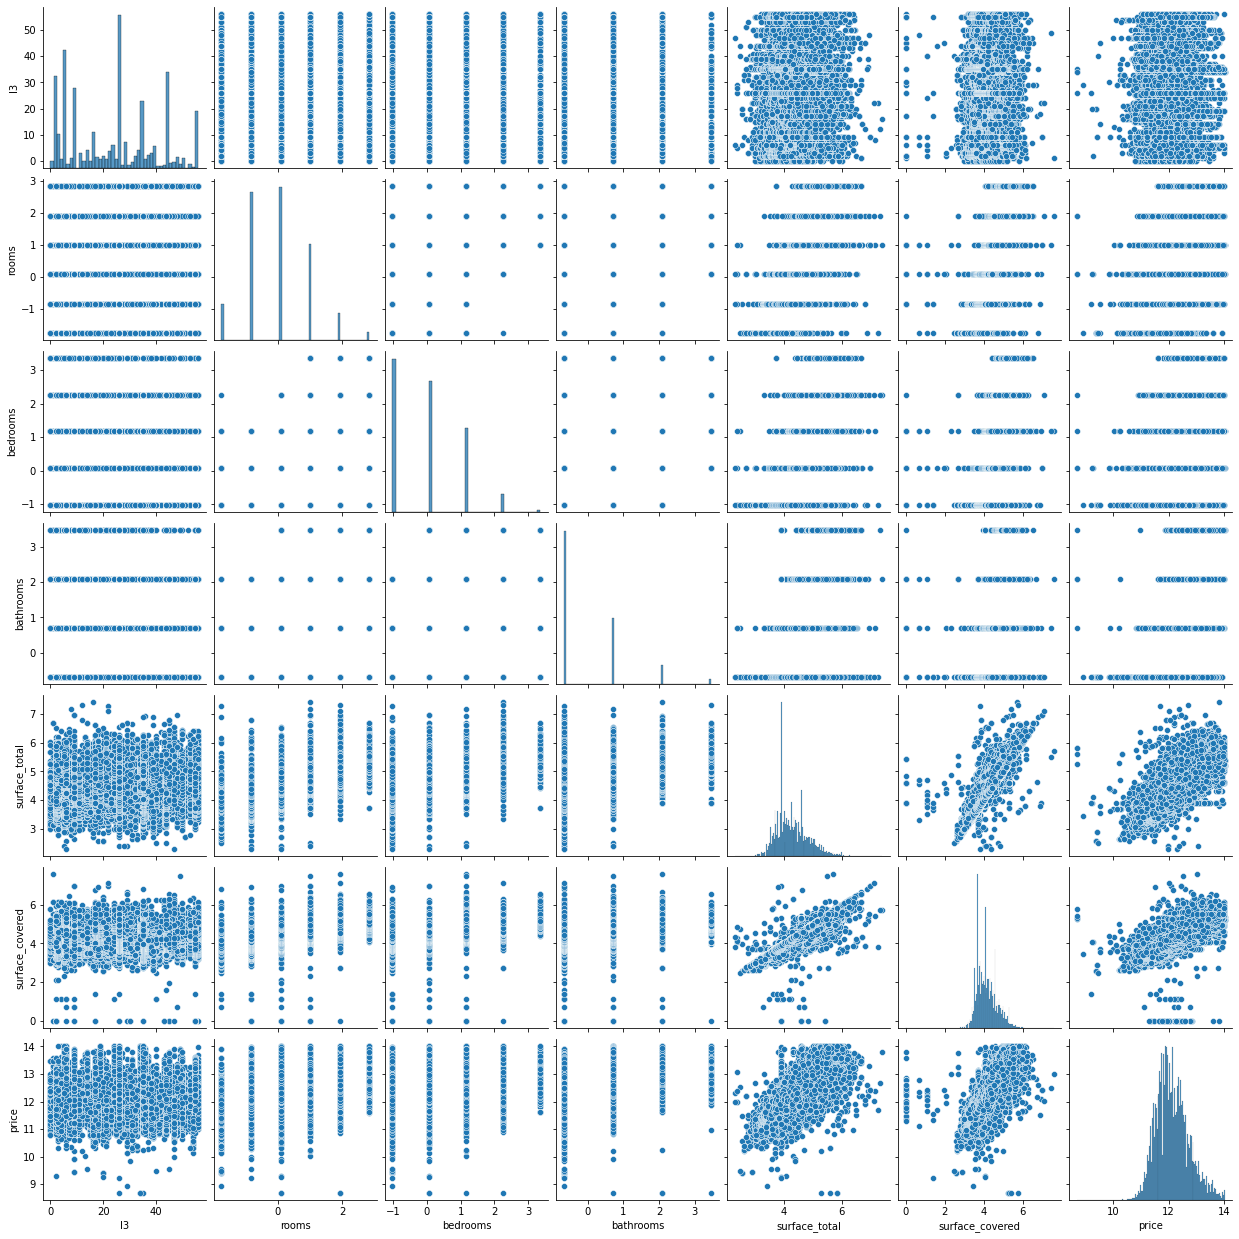

In [162]:
sns.pairplot(dataset_transformado.drop(['propiedad_Casa','propiedad_Departamento','propiedad_PH'],axis=1))

### Modelo proyecto 1
A continuación, reentrenaré y predeciré nuevamente el modelo del proyecto 1 para demostrar su desempeño a fin de poder compararlo con el modelo obtenido luego del preprocesamiento propuesto en el presente informe. Podemos ver que luego de entrenarlo, el mínimo RMSE (para k = 22) será de **$134.911**

In [163]:
# Cargo el dataset
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

# Filtro propiedades de tipo PH, departamento o casa ubicadas en Capital Federal 
filtrado = properati[properati.property_type.isin(['PH','Departamento','Casa'])& properati.l2.isin(['Capital Federal'])]

# Filtro propiedades de superficie total superior a 15 e inferior a 1000
filtrado = filtrado[(filtrado['surface_total'] >= 15) & (filtrado['surface_total'] <= 1000)]

# Filtro propiedades de precio inferior a $4.000.000
filtrado = filtrado[(filtrado['price'] <= 4000000)]

# Separo los atributos que no sean cantidad de ambientes, habitaciones, baños, superficie total, superficie cubierta y precio
filtrado = filtrado.drop(columns=['lat','lon','start_date','end_date','created_on','l1','l2','l3','currency','title','description','operation_type','property_type'])

# Descarto las instancias con valores faltantes
filtrado = filtrado.dropna(axis=0)

# Selecciono las variables predictoras y la variable a predecir
X = filtrado.drop(columns= ['price'])
y = filtrado['price']

# Realizo un train/test/split 70-30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 5)

# Selecciono el modelo de regresión que había arrojado un menor RMSE (árbol de decision) y el hiperparámetro previamente optimizado (k=22)
tree_regressor = DecisionTreeRegressor(max_depth=22,random_state=42)

# Entreno el modelo
tree_regressor.fit(X_train, y_train)

# Realizo la predicción para el set de evaluación
y_test_pred = tree_regressor.predict(X_test)

# Calculo el RMSE
rmse_accTest_sin_preprocesar = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Imprimo el resultado
print('RMSE mínimo en test de '+"${:,.2f}". format(rmse_accTest_sin_preprocesar))

RMSE mínimo en test de $134,911.47


Vuelvo a calcular el k para el dataset con el preprocesamiento propuesto

In [164]:
# Cargo el dataset
filtrado = dataset_transformado.copy()

# Selecciono las variables predictoras y la variable a predecir
X = filtrado.drop(columns= ['price'])
y = filtrado['price']

# Realizo un train/test/split 70-30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 5)

# Defino la lista vacía para los valores de accuracy deseados
rmse_accuracy_test_preprocesado = []

# Defino la lista de valores de profundidad del árbol
max_depths = np.arange(1,35)

# Genero un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    global RMSE_preprocesado
    # Defino el modelo con el valor de profundidad
    rgrT = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entreno el modelo
    rgrT.fit(X_train,y_train)
        
    # Evalúo sobre el set de evaluación y reescalo
    y_test_pred = rgrT.predict(X_test)
    rmse_accTest_preprocesado = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_test_pred)))
    
    # Agrego la información a las listas
    rmse_accuracy_test_preprocesado.append(rmse_accTest_preprocesado)
    
    rmse_dt_min = min(rmse_accuracy_test_preprocesado)
    dt_min = rmse_accuracy_test_preprocesado.index(min(rmse_accuracy_test_preprocesado))+1

print('RMSE mínimo en test de '+"${:,.2f}". format(rmse_accTest_preprocesado.min()),
      ', correspondiente a la profundidad k = ',
     f"{rmse_accuracy_test_preprocesado.index(min(rmse_accuracy_test_preprocesado))+1}")

RMSE mínimo en test de $69,283.89 , correspondiente a la profundidad k =  16


In [165]:
reduccion_error = "{1:.{0}f}%".format(2,min(rmse_accuracy_test_preprocesado)/rmse_accTest_sin_preprocesar*100)
print('La reducción del error con el preprocesamiento propuesto es del '+reduccion_error)

La reducción del error con el preprocesamiento propuesto es del 51.09%


### Conclusión
+ Podemos observar, a partir de los resultados expuestos más arriba, que el preprocesamiento propuesto del dataset reduce en un 51.09% el RMSE, lo que es un avance significativo, aunque aún lejano a un valor que pueda ser utilizado por fuera del ámbito experimental.

### Parte B - Modelos avanzados
* Para la presente sección utilizaré 6 modelos distintos de Machine Learning a fin de comparar sus rendimientos entre sí y con el modelo anteriormente expuesto, optimizando sus hiperparámetros mediante Validación Cruzada y Grid Search ó Random Search

In [166]:
tree = DecisionTreeRegressor()
bagging = BaggingRegressor()
forest = RandomForestRegressor()
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=250)
linear_model = LinearRegression()

### Entrenamiento de modelos
#### Árbol de decisión optimizado con RandomSearchCV

In [167]:
param_arbol = {"criterion": ["mse", "friedman_mse"],
             "max_depth": sp.stats.randint(2, 20),
             "min_samples_split": sp.stats.randint(2, 20)}

arbol_opt = RandomizedSearchCV(tree, param_arbol, n_iter=150, random_state=30, cv=5)
arbol_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=150,
                   param_distributions={'criterion': ['mse', 'friedman_mse'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9e49485eb0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9e4a23f310>},
                   random_state=30)

#### XGBRegressor

In [168]:
xg_modelo = XGBRegressor(objective="reg:squarederror")
xg_modelo.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### XGBRegressor optimizado con RandomSearchCV

In [169]:
parameters = {
        'num_boost_round': [10, 25, 50],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }

xg_model_opt = XGBRegressor(objective ='reg:squarederror')

xg_model_opt = RandomizedSearchCV(xg_model_opt, parameters, cv=5)

xg_model_opt.fit(X_train,y_train)

[13:23:58] WARNING: ../src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:23:59] WARNING: ../src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:24:00] WARNING: ../src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above case

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

#### RandomForestRegressor

In [170]:
forest = RandomForestRegressor(n_estimators=1000, 
                             max_features="sqrt", 
                             n_jobs=-1, 
                             oob_score = False, 
                             random_state = 42)

forest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000, n_jobs=-1,
                      random_state=42)

#### RandomForest optimizado con RandomSearchCV

In [171]:
random_rf = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

rf_random = RandomizedSearchCV(RandomForestRegressor(), 
       param_distributions = random_rf, 
       n_iter = 10, 
       cv = 3, 
       n_jobs = -1)

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]})

#### AdaBoost optimizado con RandomSearchCV

In [172]:
param_ada = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

adaboost = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_ada,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

#### Linear Regression

In [173]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

#### Determinación del RMSE para cada uno

In [174]:
def RMSE(nombres_modelos,lista_modelos, X_train, X_test,y_train,y_test):
    print("------------------------------------------")
    print(f'Modelo: árbol de decisión con preprocesamiento')
    print(f'RMSE modelo preprocesado en Test: USD {round(rmse_accTest_preprocesado,2)}')
    print(f'RMSE modelo sin preprocesar en Test: USD {round(rmse_accTest_sin_preprocesar,2)}')

    for i, model in enumerate(lista_modelos):
        y_test_pred = model.predict(X_test)
        print("------------------------------------------")
        print(f'Modelo: {nombres_modelos[i]}')
        rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))
        reduccion_error_preprocesado = "{1:.{0}f}%".format(2,-((rmse_test/min(rmse_accuracy_test_preprocesado))-1)*100)
        reduccion_error_sin_preprocesar = "{1:.{0}f}%".format(2,-((rmse_test/rmse_accTest_sin_preprocesar)-1)*100)
        print(f'RMSE en Test: USD {round(rmse_test,2)}')
        print('La reducción del error respecto al modelo con preprocesamiento es del '+reduccion_error_preprocesado)
        print('La reducción del error respecto al modelo sin preprocesamiento es del '+reduccion_error_sin_preprocesar)

In [175]:
modelos = ['DecisionTreeRegressor + RandomSearchCV','XGBRegressor','XGBoost + RandomSearchCV','RandomForest','RandomForest + RandomSearchCV','AdaBoost optimizado con RandomSearchCV','Linear Regression']

lista_modelos = [arbol_opt,xg_modelo,xg_model_opt,forest,rf_random,adaboost,linear]
RMSE(modelos, lista_modelos,X_train, X_test, y_train, y_test)

------------------------------------------
Modelo: árbol de decisión con preprocesamiento
RMSE modelo preprocesado en Test: USD 69283.89
RMSE modelo sin preprocesar en Test: USD 134911.47
------------------------------------------
Modelo: DecisionTreeRegressor + RandomSearchCV
RMSE en Test: USD 68553.61
La reducción del error respecto al modelo con preprocesamiento es del 0.54%
La reducción del error respecto al modelo sin preprocesamiento es del 49.19%
------------------------------------------
Modelo: XGBRegressor
RMSE en Test: USD 65493.52
La reducción del error respecto al modelo con preprocesamiento es del 4.98%
La reducción del error respecto al modelo sin preprocesamiento es del 51.45%
------------------------------------------
Modelo: XGBoost + RandomSearchCV
RMSE en Test: USD 67389.64
La reducción del error respecto al modelo con preprocesamiento es del 2.23%
La reducción del error respecto al modelo sin preprocesamiento es del 50.05%
------------------------------------------

* Podemos observar a partir de los resultados expuestos más arriba que el modelo de mejor desempeño es el de Random Forest, el cual reduce el error cuadrático medio en un 56.29% respecto al mejor modelo (árboles de decisión) del Proyecto 01, y en un 14.45% respecto al mismo modelo con preprocesamiento del presente informe

* De todas formas, como podemos ver más abajo, el valor del mejor RMSE obtenido sigue siendo alto

In [176]:
y_test_pred = forest.predict(X_test)
rmse_test_forest = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))
num_menores_RMSE = properati[properati["price"]<=2*rmse_test_forest].count()["price"]
num_instancias = properati["price"].count()

# Calculo la proporción de instancias en donde 1/3 del valor de la propiedad supere el RMSE
proporcion_propiedades = num_menores_RMSE/num_instancias
print(f'El valor del RMSE resulta la mitad del '+"{1:.{0}f}%".format(2,proporcion_propiedades*100)+' de las propiedades')

El valor del RMSE resulta la mitad del 27.51% de las propiedades


## Parte C - Interpretación de datos

A continuación, graficaré la importancia de cada variable en 2 árboles de decisión obtenidos al azar

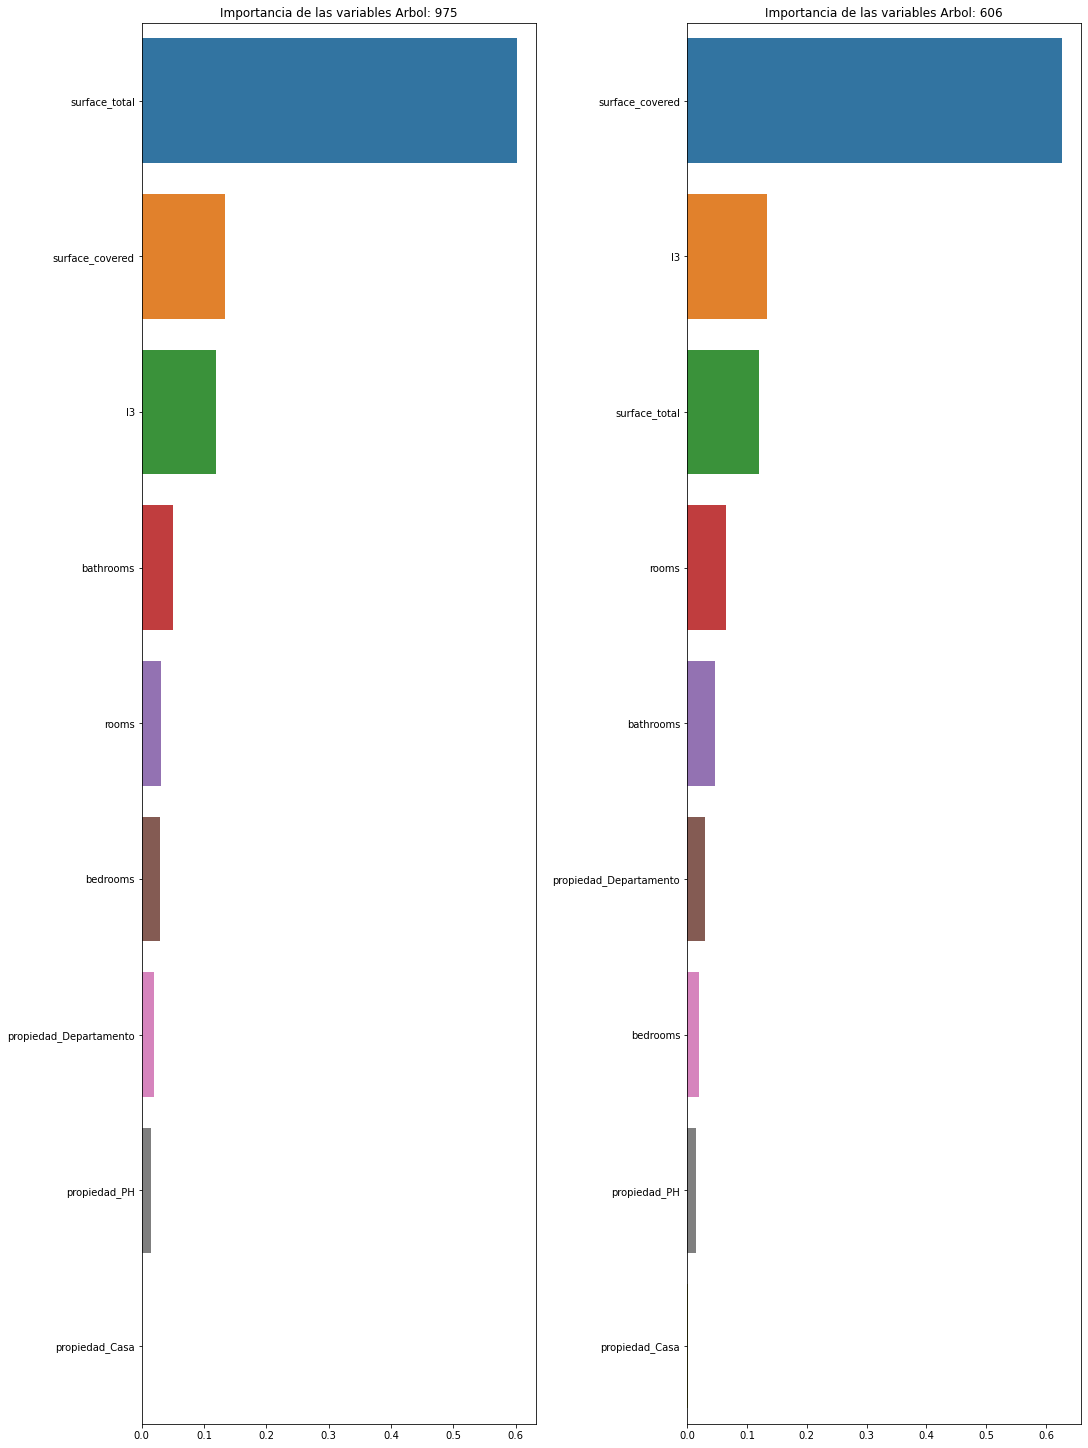

In [177]:
fig, axes = plt.subplots(1,2,figsize=(15,20), constrained_layout=True)
ax1, ax2 = axes.flatten()  

lista_arboles = np.random.randint(low=1,high=999, size=2)

importances = forest.estimators_[lista_arboles[0]].feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

sns.barplot(y=columns[indices], x=importances[indices])
g1 = sns.barplot(y=columns[indices], x=importances[indices],ax = ax1)
g1.set(title="Importancia de las variables Arbol: " +str(lista_arboles[0]))

importances = forest.estimators_[lista_arboles[1]].feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

sns.barplot(y=columns[indices], x=importances[indices])
g2 = sns.barplot(y=columns[indices], x=importances[indices],ax = ax2)
g2.set(title="Importancia de las variables Arbol: " +str(lista_arboles[1]))
  
plt.show()

Puedo observar que tomando diferentes árboles al azar obtengo diferentes importancias de los atributos en la determinación de los rendimientos obtenidos

Esto se debe a que el modelo, por cada simulación, genera una nueva instancia que corresponde a un subconjunto del set de entrenamiento con un subconjunto de los atributos. Cada árbol será único y considerará una parte de las variables. Es por esto que ambos gráficos serán distintos

Me llamó la atención la diferencia de importancias entre la superficie total y cubierta en ambos árboles cuando ambas variables correlacionan en gran medida entre sí y con el precio. Esperaría una importancia similar.

De todas formas, me parece esperable que se ponderen como más importantes predictores del precio los atributos asociados a la superficie de las propiedades, aunque tal vez esperaba que el barrio al que pertenecen influya aún más sobre el precio

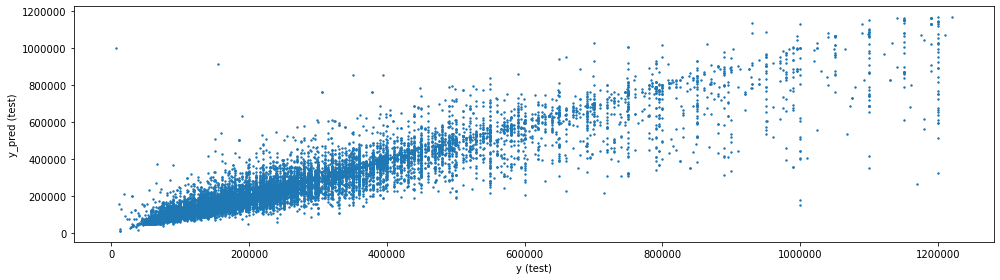

In [178]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))

plt.figure(figsize = (14,4))
plt.scatter(np.exp(y_test),np.exp(y_test_pred), s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.ticklabel_format(style='plain')

plt.tight_layout()
plt.show()

* Observando el gráfico anterior, se puede ver que el modelo se ajusta a la recta para propiedades de menor valor (idealmente menos de 200.000), lo que significa que el valor de la predicción se asemeja en mayor medida al set de entrenamiento.

* A medida que vemos crecer el valor de la propiedad, también crece la dispersión del gráfico, y por lo tanto el error a la hora de predecir el precio



## Conclusiones

* Considero que, como era de esperarse, las mejoras propuestas, tanto el preprocesamiento como el uso de mejores modelos predictivos en el presente informe mejoran notoriamente el rendimiento respecto al proyecto 1. Agregar variables como el barrio, reducir el ruido de los outliers, escalar las variables o no descartar tantas instancias sólo por poseer valores faltantes enriquece en gran medida el modelo

* A su vez, podría decirse que los valores obtenidos no son los ideales para implementar en un negocio inmobiliario real. Se podrían recopilar más datos que ayuden a diferenciar los segmentos de precios, como por ejemplo:
       
       - Tenencia de pileta
       - Tenencia de asador
       - Cercanía a lugares de interés (aeropuertos, terminal de colectivos, paradas de transporte público, etc)
       - Remodelada o no
       - Barrio privado o no

Estos features podrían ayudar a mejorar las predicciones.

* Otra alternativa es generar diferentes modelos según sea el tipo de propiedad, o por lo menos para los más representativos (Departamento, Casa y PH) para así no incurrir en desvíos dadas las diferentes distribuciones.

* Para cerrar, considero que los resultados obtenidos son más que satisfactorios y aún queda mucho por explorar y mejorar, pero se transita el camino correcto.